# Etap 1.2.1
## wizualizacja danych z "Data/Concatenated Features/by_year_features.csv" za pomocą t-SNE
## kolorowanie według roku lub nazwy spółki

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
final_df= pd.read_csv("Data/Concatenated Features/by_year_features.csv")
final_df

,indeks,(SubTotal),Przepisy długoterminowe,Amortyzacja i straż pożarna,Kapitał partnerstwa głównego,Akcje mniejszościowe,Przepisy zadłużenia,Żywe istoty,Zachęta państwowa i pomoc,Zwiększenie wartości fundusze,...,Zobowiązania długoterminowe,Inne dochody i wydatki przed opodatkowaniem,Yab. Money Trans. Różnica. Efekt. Poprzedni.nak.ve nak. Tak jak. Wzrost/spadek netto,Sprzedaż zagraniczna,Sprzedaż krajowa,Akcje zysków/strat inwestycji cenianych metodą samowystarczalności,Samo -właściwość,Źródło_pliku,Nazwa,Rok
0,Yıllık,4.524640e+08,678404.0,1242248.0,1.387926e+08,0.0,2852756.0,0.0,0.0,0.0,...,2.806817e+06,449296.0,-9.990337e+06,0.0,0.000000e+00,0.0,1.387926e+08,A1CAP_2020.xlsx,A1CAP,2020
1,Yıllık,8.515088e+08,0.0,3263754.0,2.966258e+08,0.0,6670834.0,0.0,0.0,0.0,...,8.695590e+06,777230.0,1.219768e+08,0.0,0.000000e+00,0.0,2.966258e+08,A1CAP_2021.xlsx,A1CAP,2021
2,Yıllık,4.019261e+09,4748296.0,12651941.0,1.487849e+09,0.0,70752251.0,0.0,0.0,0.0,...,1.322796e+08,17107575.0,4.631366e+08,0.0,0.000000e+00,0.0,1.487849e+09,A1CAP_2022.xlsx,A1CAP,2022
3,Yıllık,6.297396e+09,7715324.0,21452328.0,3.696944e+09,0.0,42331251.0,0.0,0.0,0.0,...,3.402570e+07,6055765.0,6.918640e+08,0.0,0.000000e+00,0.0,3.696944e+09,A1CAP_2023.xlsx,A1CAP,2023
4,Yıllık,8.297508e+09,9773361.0,31826374.0,4.065838e+09,0.0,28062814.0,0.0,0.0,0.0,...,1.602956e+08,5169826.0,3.694612e+08,0.0,0.000000e+00,0.0,4.065838e+09,A1CAP_2024.xlsx,A1CAP,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,Yıllık,1.327080e+08,72995.0,165625.0,5.068184e+09,0.0,10233590.0,0.0,0.0,0.0,...,6.170988e+06,1884700.0,-9.830716e+07,7920512.0,5.550519e+07,310120.0,5.068184e+09,ZRGYO_2020.xlsx,ZRGYO,2020
6776,Yıllık,6.893466e+08,120595.0,930862.0,8.372611e+09,0.0,49141.0,0.0,0.0,0.0,...,5.515990e+06,0.0,5.720385e+08,15848936.0,6.865245e+07,410957.0,8.372611e+09,ZRGYO_2021.xlsx,ZRGYO,2021
6777,Yıllık,2.496854e+08,1176786.0,6006199.0,3.211000e+10,0.0,251237.0,0.0,0.0,0.0,...,1.342220e+09,0.0,-1.048027e+09,57049958.0,1.897433e+08,175390704.0,3.211000e+10,ZRGYO_2022.xlsx,ZRGYO,2022
6778,Yıllık,3.347212e+09,2191400.0,8614092.0,5.246534e+10,0.0,546147.0,0.0,0.0,0.0,...,2.347870e+09,0.0,2.255648e+09,94705431.0,8.667884e+08,0.0,5.246534e+10,ZRGYO_2023.xlsx,ZRGYO,2023


In [10]:
print(final_df.columns.values)

['indeks' '(SubTotal)' 'Przepisy długoterminowe'
 'Amortyzacja i straż pożarna' 'Kapitał partnerstwa głównego'
 'Akcje mniejszościowe' 'Przepisy zadłużenia' 'Żywe istoty'
 'Zachęta państwowa i pomoc' 'Zwiększenie wartości fundusze'
 'Inne należności' 'Inne długi' 'Inne stałe aktywa'
 'Inne obracające się zasoby' 'Inne obowiązki finansowe'
 'Inne dochody i wydatki' 'Inne dochody/ wydatki'
 'Inne zobowiązania krótkoterminowe' 'Inne długoterminowe obowiązki'
 'Inne dochody podatkowe (wydatki)'
 'Gotówka z innych działań inwestycyjnych' 'Inne ołówki Selfer'
 'Gotówka z innych działalności biznesowej'
 'Zobowiązanie podatkowe zysków terminowych'
 'Śnieg netto/uszkodzenie tego okresu' 'Dochody podatkowe (wydatki)'
 'Odkładane przychody (obietnica klienta. Dogan Load. Zewnętrzna. Kal.)'
 'Odkładane przychody (Word Client Word.doğan Yür.'
 'Odroczone dochody podatkowe (wydatki)' 'Przełożona obecność podatkowa'
 'Odkładany obowiązek podatkowy'
 'Otrzymają z działalności sektora finansowego'
 'D

In [17]:
len(final_df['Nazwa'].unique())

555

In [ ]:
len(final_df['Rok'].unique())

17

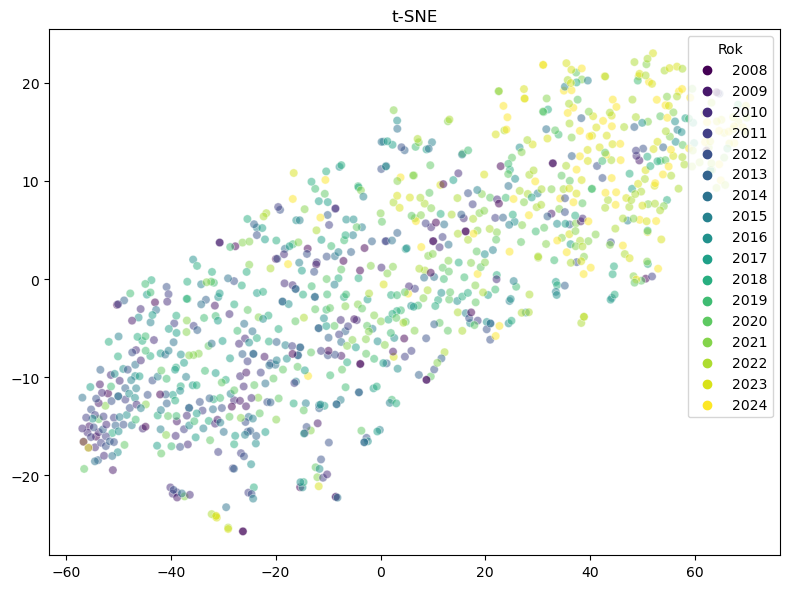

In [3]:
# Parametr: ile rekordów chcemy wyświetlić
n = 1000

# Losowy wybór n rekordów (jeśli mamy więcej niż n)
if len(final_df) > n:
    sampled_df = final_df.sample(n, random_state=42)
else:
    sampled_df = final_df.copy()

# 1. Przygotowanie danych: wybieramy tylko kolumny numeryczne i zamieniamy NaN na 0
X = sampled_df.select_dtypes(include=[np.number]).fillna(0)

# Upewnijmy się, że kolumna 'rocznie' jest typu liczbowego (int) i posortowana
sampled_df['Rok'] = pd.to_numeric(sampled_df['Rok'], errors='coerce')
sampled_df['Rok'] = sampled_df['Rok'].sort_values()

# 2. t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=5700)
X_tsne = tsne.fit_transform(X)

# 3. Wizualizacja
plt.figure(figsize=(8, 6))

# Scatter plot z legendą, uwzględniając porządek liczbowy
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=sampled_df['Rok'], palette='viridis', legend='full',alpha=0.5 )

# Dodajemy tytuł
plt.title('t-SNE')

# Wyświetlamy legendę
plt.legend(title='Rok', loc='upper right')

plt.tight_layout()
plt.show()


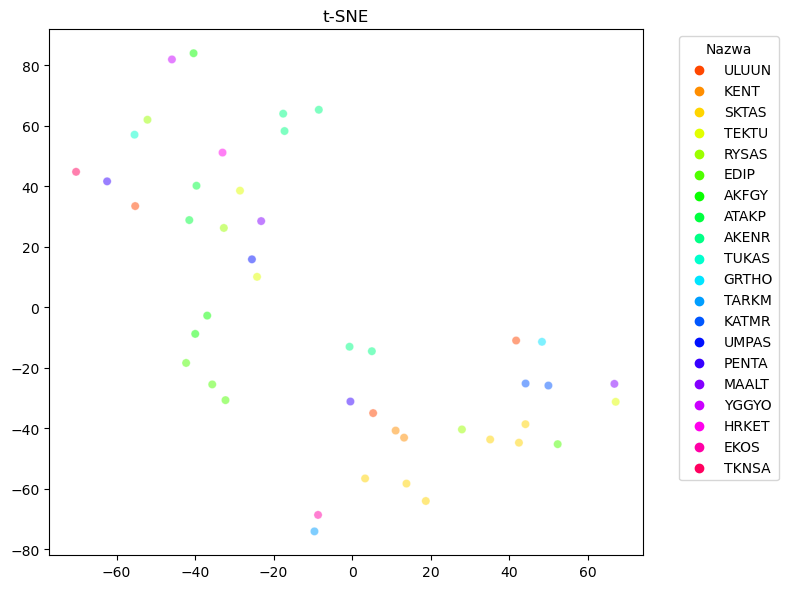

In [4]:
# Parametr: ile unikalnych nazw chcemy wybrać
N = 20  # Liczba unikalnych nazw

# Wybór N różnych nazw z kolumny 'nazwa' (lub jakiejkolwiek kolumny z unikalnymi wartościami)
unique_names = sampled_df['Nazwa'].drop_duplicates().sample(N, random_state=4)

# Filtrujemy rekordy, które odpowiadają wybranym nazwom
sampled_df_unique = sampled_df[sampled_df['Nazwa'].isin(unique_names)]

# 1. Przygotowanie danych: wybieramy tylko kolumny numeryczne i zamieniamy NaN na 0
X = sampled_df_unique.select_dtypes(include=[np.number]).fillna(0)


# 2. t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=min(N,5), n_iter=1000)
X_tsne = tsne.fit_transform(X)

# 3. Wizualizacja
plt.figure(figsize=(8, 6))

# 4. Przygotowujemy paletę kolorów dynamicznie
palette = sns.color_palette('hsv', n_colors=N)

# Scatter plot z legendą, uwzględniając porządek liczbowy
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=sampled_df_unique['Nazwa'], palette=palette, legend='full',alpha=0.5 )

# Dodajemy tytuł
plt.title('t-SNE')

# Legenda
plt.legend(title='Nazwa', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

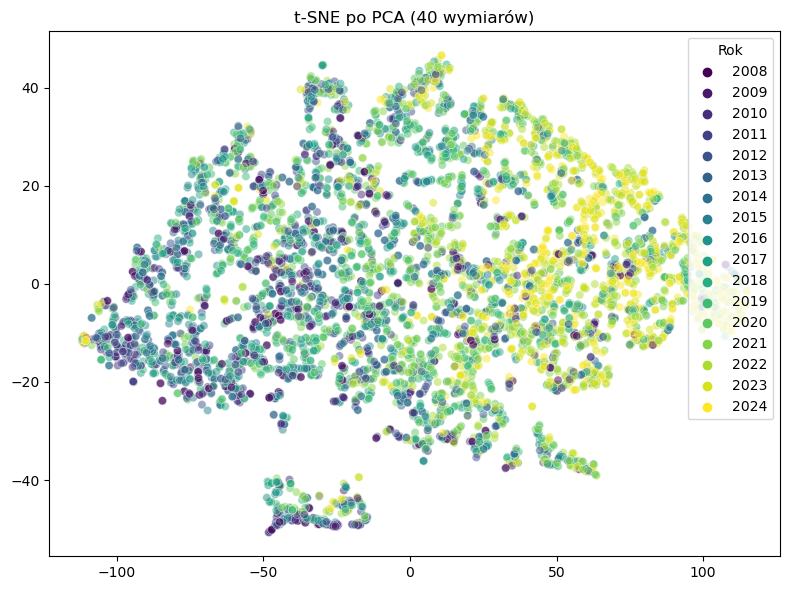

In [5]:
from sklearn.decomposition import PCA


# Parametr: ile rekordów chcemy wyświetlić
n = 5700

# Losowy wybór n rekordów (jeśli mamy więcej niż n)
if len(final_df) > n:
    sampled_df = final_df.sample(n, random_state=42)
else:
    sampled_df = final_df.copy()

# 1. Przygotowanie danych: wybieramy tylko kolumny numeryczne i zamieniamy NaN na 0
X = sampled_df.select_dtypes(include=[np.number]).fillna(0)

# 2. PCA redukcja do 40 wymiarów
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X)

# 3. t-SNE na danych po PCA
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_pca)

# 4. Upewnijmy się, że kolumna 'Rok' jest liczbą i w dobrej kolejności
sampled_df['Rok'] = pd.to_numeric(sampled_df['Rok'], errors='coerce')

# 5. Wizualizacja
plt.figure(figsize=(8, 6))


# Scatter plot z legendą
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=sampled_df['Rok'], palette='viridis', legend='full', alpha=0.5)

# Dodajemy tytuł
plt.title('t-SNE po PCA (40 wymiarów)')

# Legenda
plt.legend(title='Rok', loc='upper right')

plt.tight_layout()
plt.show()

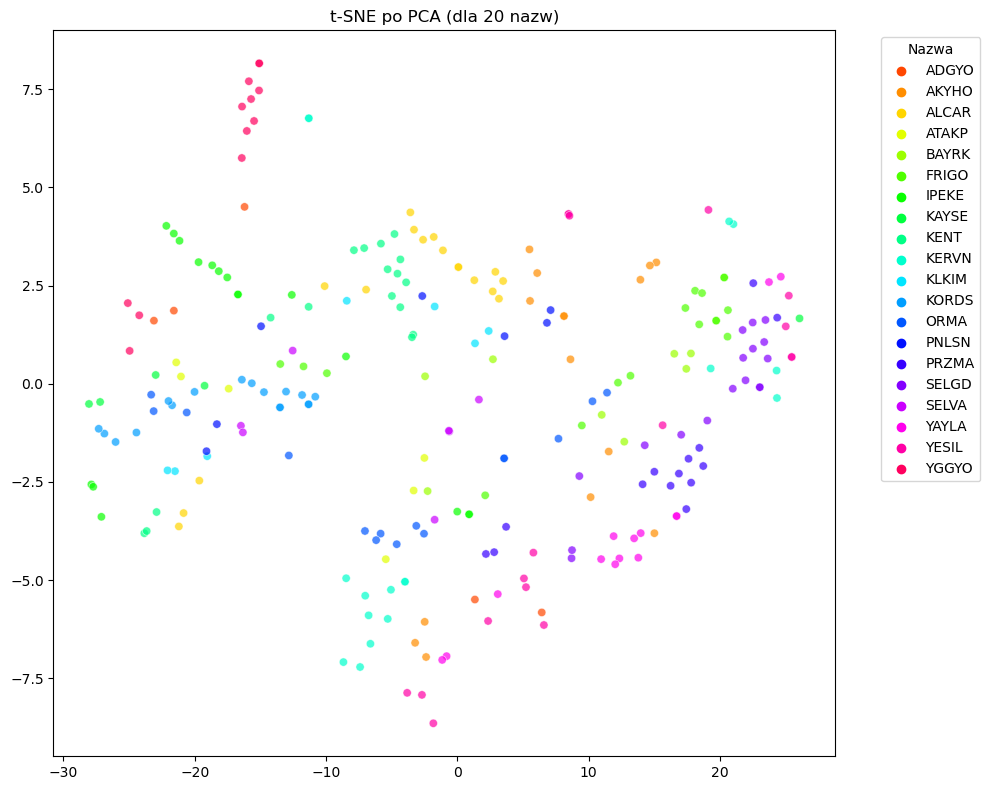

In [6]:
# Parametr: liczba unikalnych nazw do pokazania
N = 20  # <- tu ustawiasz ile chcesz

# 1. Wybieramy N unikalnych nazw
unique_names = final_df['Nazwa'].dropna().unique()
selected_names = np.random.choice(unique_names, size=min(N, len(unique_names)), replace=False)

# 2. Filtrowanie danych tylko do wybranych nazw
sampled_df = final_df[final_df['Nazwa'].isin(selected_names)].copy()

# 3. Przygotowanie danych: tylko numeryczne kolumny i NaN -> 0
X = sampled_df.select_dtypes(include=[np.number]).fillna(0)

# 4. PCA redukcja do 10 wymiarów
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X)

# 5. t-SNE na danych po PCA
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_pca)

# 6. Przygotowujemy paletę kolorów dynamicznie
palette = sns.color_palette('hsv', n_colors=N)

# 7. Wizualizacja
plt.figure(figsize=(10, 8))

# Scatter plot z kolorami według 'Nazwa'
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=sampled_df['Nazwa'], palette=palette, legend='full', alpha=0.7)

# Tytuł
plt.title(f't-SNE po PCA (dla {N} nazw)')

# Legenda
plt.legend(title='Nazwa', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
